In [20]:
import numpy as np 
import pylab as pl

from scipy.optimize import curve_fit
from scipy.special import erfc

from simlightcurve import curves

In [8]:
hr = 60*60
decay_tau=1.*24*hr
rise_tau=decay_tau*0.3
t1_offset = decay_tau

fred = curves.LinearExp(
    amplitude=1.0,
    rise_time=rise_tau*1.5,
    decay_tau=decay_tau,
    t0=None
)

gred = curves.GaussExp(
            amplitude=1.0,
            rise_tau=rise_tau,
            decay_tau=decay_tau,
            t0=None
)

grpld = curves.GaussPowerlaw(
    amplitude = 1.0,
    rise_tau=rise_tau,
    decay_alpha=-1.5,
    decay_offset=decay_tau,
    t0=None
)

tsteps = np.linspace(-rise_tau*3, decay_tau*5,40 )
len(tsteps)

40

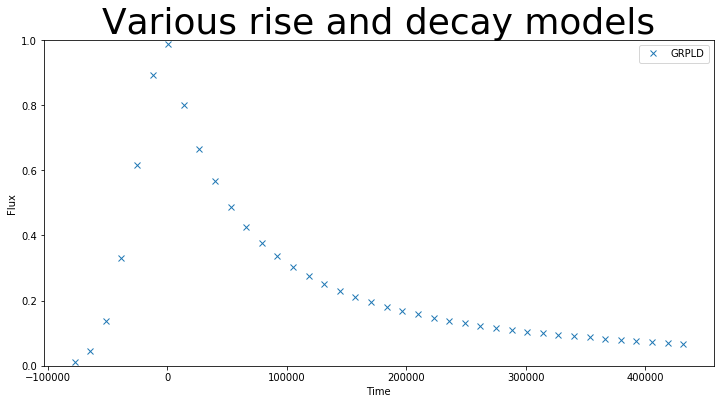

In [9]:
data = grpld(tsteps)
fig = pl.figure(figsize=(12, 6))
pl.title('Various rise and decay models', fontsize=36)

pl.xlabel('Time')
pl.ylabel('Flux')
#pl.plot(tsteps, fred(tsteps), label='FRED', ls='--')
#pl.plot(tsteps, gred(tsteps), label='GRED', ls='--')
pl.plot(tsteps, data,'x', label='GRPLD')
# pl.set_xscale('log')
# pl.set_yscale('log')
pl.ylim(1e-5,1.001)
pl.legend()
pl.show()

In [10]:
def gpl(time,amplitude,rise_tau,decay_alpha,decay_offset):
    grpld = curves.GaussPowerlaw(
    amplitude = amplitude,
    rise_tau=rise_tau,
    decay_alpha=decay_alpha,
    decay_offset=decay_offset,
    t0=None)
    return grpld(time)



In [25]:
param, cov = curve_fit(f=gpl,
                           xdata=tsteps,
                           ydata=data/np.max(data)
                           )

/usr/local/lib/python3.5/dist-packages/simlightcurve-0+untagged.23.g801b8e8-py3.5.egg/simlightcurve/curves/composite/gausspowerlaw.py:31: RuntimeWarning: invalid value encountered in power
/usr/local/lib/python3.5/dist-packages/simlightcurve-0+untagged.23.g801b8e8-py3.5.egg/simlightcurve/curves/powerlaw.py:93: RuntimeWarning: invalid value encountered in power
/home/kimeel/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [42]:
def expgauss(x,A,mu,sigma,lamb):
    d = lamb/2 
    b = 2*mu + lamb*(sigma**2) - 2*x
    c = (mu + lamb*(sigma**2) - x)/(np.sqrt(2)*sigma)
    func = d*np.exp(d*b)*erfc(c)
    return A*func/np.max(func)


In [30]:
param, cov = curve_fit(f=expgauss,
                           xdata=tsteps,
                           ydata=data/np.max(data)
                           )

/home/kimeel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/kimeel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/home/kimeel/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


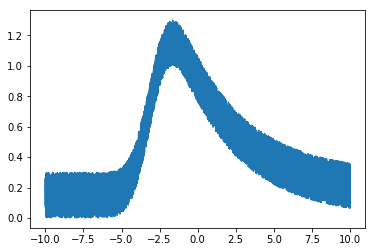

In [45]:
testx = np.linspace(-10,10,10000)
testy = expgauss(testx,1,-3,1,0.25)
pl.plot(testx,testy + 0.3*np.random.random(len(testy)))
pl.show()

In [48]:
param, cov = curve_fit(f=expgauss,
                           xdata=testx,
                           ydata=2.65*testy/np.max(testy)
                           )

In [49]:
param

array([ 2.65, -3.  ,  1.  ,  0.25])